In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB #this is our classifier of choice for this notebook
from sklearn.model_selection import train_test_split

In [2]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [3]:
#Download the databases we need

nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2024-04-09 18:57:13--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  12.3MB/s    in 0.4s    

2024-04-09 18:57:14 (12.3 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [5]:
#read our downloaded csv
df = pd.read_csv('bbc_text_cls.csv')

In [6]:
#preview the data to see what it looks like
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [7]:
#print a specific cell by referencing the column first then the row number

print(df['text'][0])

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL

In [8]:
#print the length in chars of the body of text in that cell

print(len(df['text'][0]))

2558


In [9]:
#print the number of words in the body of text in that cell
print(len(df['text'][0].split()))

421


In [10]:
#Assign the columns to 2 separate variables
inputs = df['text']
labels = df['labels']

<Axes: >

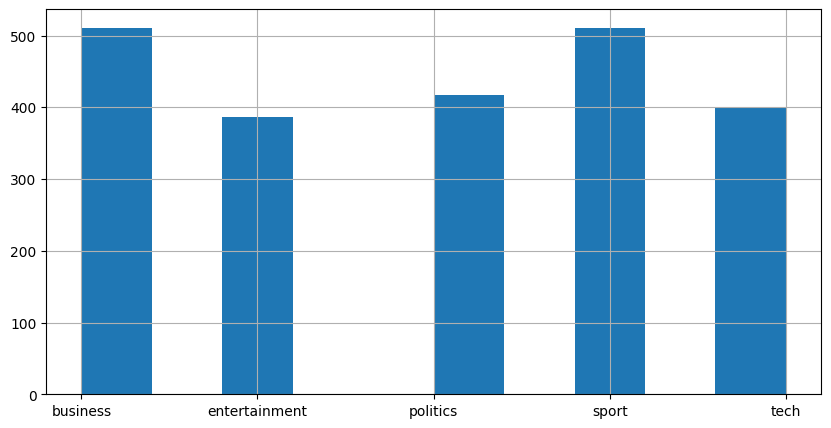

In [11]:
#create a histogram to see whether we have imbalanced classes in our labels

labels.hist(figsize=(10,5))

From the histogram above we can see that we don't seem to have huge differences in the numbers of each label


### Create Train-Test split

We must do this before using the count vectorizer

In [12]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state= 123)

In [13]:
#instantiate count vectorizer
vectorizer = CountVectorizer()

In [14]:
Xtrain = vectorizer.fit_transform(inputs_train)

If you're using CountVectorizer from scikit-learn in Python, vectorizer.fit_transform(inputs_train) operates specifically by counting the frequency of each word in your inputs_train dataset, which is a collection of text documents. Here's a detailed explanation of the process:

Fit: This step involves analyzing the inputs_train to build a vocabulary of all the unique words found across all documents in the training set. The fit method scans through all the text documents in inputs_train, tokenizes them (splits the text into individual words or terms according to a specified tokenization strategy), and identifies the unique words. Each unique word is then assigned a specific integer index. This vocabulary is crucial for the next step, as it defines which columns correspond to which words when we transform the text documents into numerical vectors.

Transform: During the transform step, CountVectorizer converts each text document into a numerical vector using the vocabulary established in the fit step. Each element in this vector represents a word from the vocabulary, and the value in each element is the count of how many times that word appears in the document. For instance, if our vocabulary is ["apple", "banana", "cherry"], and our document is "apple banana apple", the resulting vector would be [2, 1, 0] indicating that "apple" appears twice, "banana" appears once, and "cherry" does not appear at all.

The fit_transform method combines these two steps efficiently. Instead of first fitting to learn the vocabulary and then transforming the documents in two separate steps, fit_transform does both at once. This is not only more concise code-wise but also typically more computationally efficient.

The output of vectorizer.fit_transform(inputs_train) is a sparse matrix where each row corresponds to a document in inputs_train, and each column represents a word in the vocabulary. The value at a given position in the matrix represents the count of the word in the document. Sparse matrix representation is used because not all words appear in all documents, leading to many zeros in the matrix; storing only the non-zero counts saves a lot of memory.

In [16]:
Xtest = vectorizer.transform(inputs_test) #the number of columns represents the number of unique words in the vocabulary

In [18]:
#Print Xtrain
Xtrain # -> size of matrix shows around 1600 rows and 26K columns

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [24]:
#Compute the percentage of values that are non zero

(Xtrain!=0) #Gives a boolean matrix with true where value is non zero and false otherwise
(Xtrain!=0).sum()

337411

In [29]:
#Percentage of values that are non-zero
((Xtrain!=0).sum()/np.prod(Xtrain.shape))*100 #np.prod gives the product of all the elements (rows x columns)

#Less than 1 % of the matrix contains non zero values so we are justified in using a sparse represenation

0.7695239935415004

### Training our model

In [31]:
#Create model instance of multinomial naive bayes

model = MultinomialNB()
#Fit model on training set
model.fit(Xtrain, Ytrain)
# Check performance of model on both train and test
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9922062350119905
test score:  0.9712746858168761


In [34]:
# Experiment using stop word removal to see if that improves accuracy
vectorizer = CountVectorizer(stop_words= 'english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model= MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain,Ytrain)) #inputs and label training
print("test score: ", model.score(Xtest, Ytest)) #inputs and label testing

train score: 0.9928057553956835
test score:  0.9766606822262118


###Experiment using lemmatization to see if that improves model accuracy

In [36]:
#Experiment using lemmatization to see if that improves accuracy

#define a function that maps POS tags in NLTK
def get_wordnet_pos(treebank_tag:str):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [53]:
#define a Lemma Tokenizer class
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self,doc):
    tokens = word_tokenize(doc)
    #obtain part of speech tags from nltk
    words_and_tags = nltk.pos_tag(tokens)
    #loop through each word-tag pair to get a list containing each lemmatized word in the input document
    return [self.wnl.lemmatize(word,pos=get_wordnet_pos(tag)) \
      for word,tag in words_and_tags]

In [54]:
vectorizer = CountVectorizer(tokenizer= LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score: ", model.score(Xtrain,Ytrain))
print("test score: ", model.score(Xtest,Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score:  0.9922062350119905
test score:  0.9676840215439856


### Experiment using stemming to see if that improves model accuracy

In [59]:
# define a stem tokenizer class

class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self,doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [61]:
vectorizer = CountVectorizer(tokenizer = StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("training score: ", model.score(Xtrain,Ytrain))
print("testing score: ", model.score(Xtest, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


training score:  0.9892086330935251
testing score:  0.9694793536804309
